# **Passo 1: Primero vamos instalar os Pacotes Necessários.**

**Antes de criar o gráfico, precisamos instalar as bibliotecas que serão utilizadasm, caso ela ainda não estejam instaladas.**

In [26]:
install.packages('ggplot2')  # Pacote para análises estatísticas experimentais
install.packages('ggpmisc') # Para adicionar equações de regressão ao gráfico
install.packages('readxl') # Para importar arquivos Excel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggpmisc"):
“installation of package ‘ggpmisc’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Passo 2: Carregar os Pacotes Necessários**

**Antes de criar o gráfico, precisamos carregar as bibliotecas que serão utilizadas.**

In [27]:
# Pacotes necessários
library(ggplot2)      # Para criar gráficos
library(ggpmisc)      # Para adicionar equações de regressão ao gráfico
library(readxl)     # Para importar arquivos Excel

**📌 ggplot2: Biblioteca principal para criar gráficos.**

**📌 ggpmisc: Permite adicionar equações de regressão e R² diretamente no gráfico.**

**📌 readxl: Utilizado para ler arquivos do Excel.**

# **Passo 3: Importar os Dados**

**Agora, carregamos os dados que serão usados na análise.**

In [28]:
# Carregar os dados
dados <- read_xlsx("/content/mini_curso_regressao2.xlsx")

**📌 read.xlsx() importa os dados de um arquivo Excel.**

🔹**Verificar se os dados foram carregados corretamente:**

In [29]:
# Exibir as primeiras linhas dos dados
head(dados)

clones,espacamento,diametro,altura
<chr>,<dbl>,<dbl>,<dbl>
sabia_1,2.0,3.82,12.0
sabia_1,2.5,5.22,11.5
sabia_1,5.0,10.48,11.0
sabia_1,6.0,12.56,10.5
sabia_1,7.5,15.75,10.0
sabia_2,2.0,5.95,10.8


🔹**Obter um resumo estatístico dos dados:**

In [30]:
# Resumo dos dados
summary(dados)

    clones           espacamento     diametro          altura     
 Length:20          Min.   :2.0   Min.   : 3.820   Min.   :10.00  
 Class :character   1st Qu.:2.5   1st Qu.: 7.662   1st Qu.:10.72  
 Mode  :character   Median :5.0   Median :12.430   Median :11.00  
                    Mean   :4.6   Mean   :11.809   Mean   :10.93  
                    3rd Qu.:6.0   3rd Qu.:15.488   3rd Qu.:11.15  
                    Max.   :7.5   Max.   :19.700   Max.   :12.00  

**📌 Isso ajuda a entender a estrutura dos dados antes da modelagem.**

# **Passo 4: Criar o Gráfico de Regressão**

**Agora começa a construção do gráfico no ggplot2. Vamos entender cada parte.**

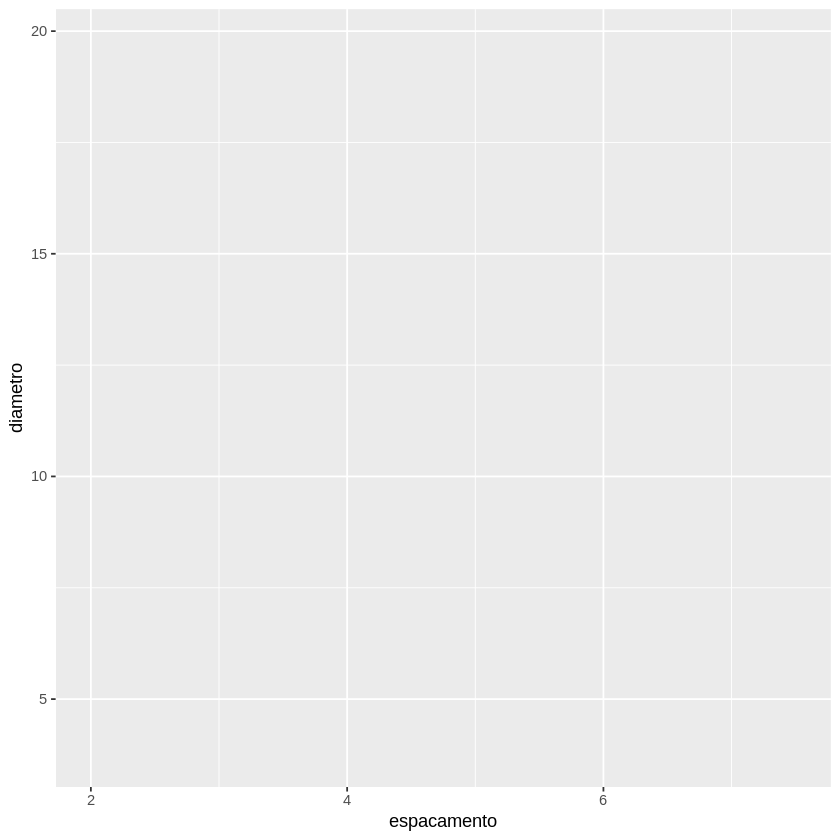

In [31]:
ggplot(dados, aes(x=espacamento, y=diametro, group=clones, color=clones))

**📌 ggplot(dados, aes(...)) define os eixos e as variáveis a serem usadas no gráfico.**

**✔ x = espacamento → Variável no eixo X.**

**✔ y = diametro → Variável no eixo Y.**

➤ **Na segunda parte vamos adicionar os pontos ao gráfico**

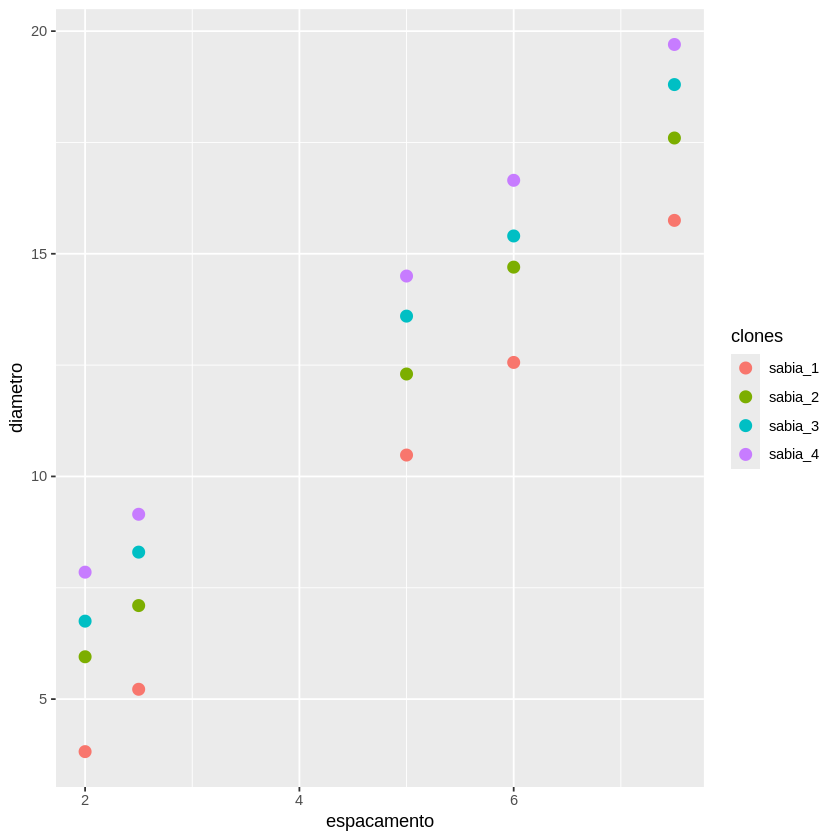

In [32]:
ggplot(dados, aes(x=espacamento, y=diametro, group=clones, color=clones)) +

  geom_point(size=3)

**📌 geom_point() adiciona os pontos ao gráfico.**

**✔ O size=3 define o tamanho dos pontos.**

➤ **Em seguida adicionamos a linha de regressão**

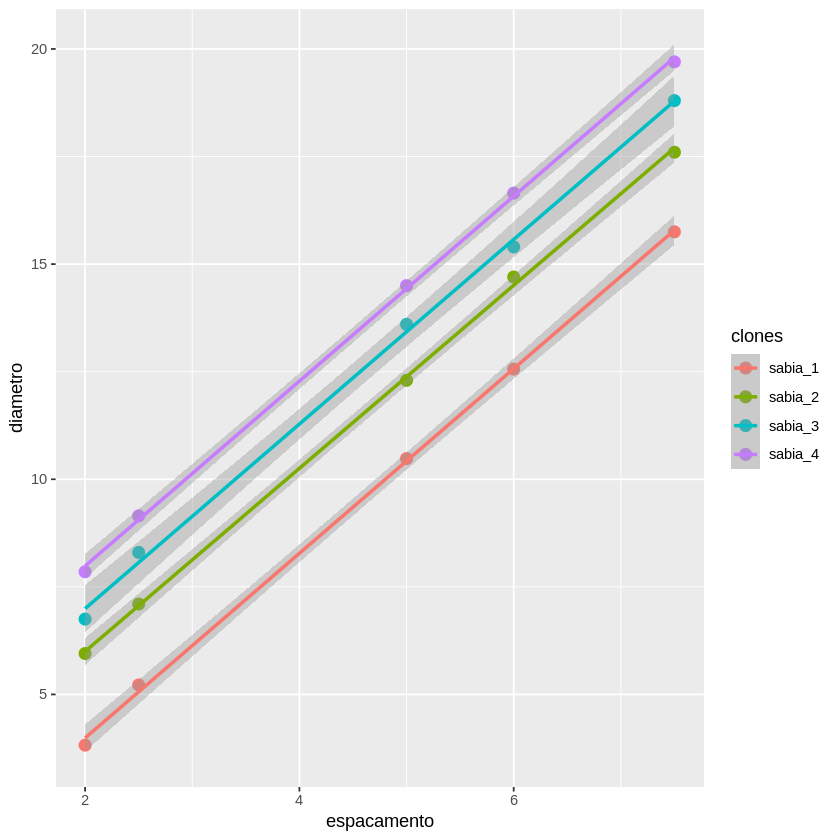

In [33]:
ggplot(dados, aes(x=espacamento, y=diametro,group=clones, color=clones)) +
      geom_point(size=3)+

      geom_smooth(method="lm", formula = y ~ poly(x, 1), se=TRUE)

**📌 geom_smooth() adiciona uma curva de ajuste.**

**✔ method="lm" → Ajuste de regressão linear.**

**✔ formula = y ~ poly(x, 1) → Define a equação da regressão (polinômio de 1ª ordem). Caso queria de polinômio de 2ª basta mudar do numero 1 para o 2 e assim sucessivamente**

**✔ se=FALSE → Não exibe a área sombreada de intervalo de confiança.**

➤ **Agora vamos adicionar a equação da regressão e o R²**

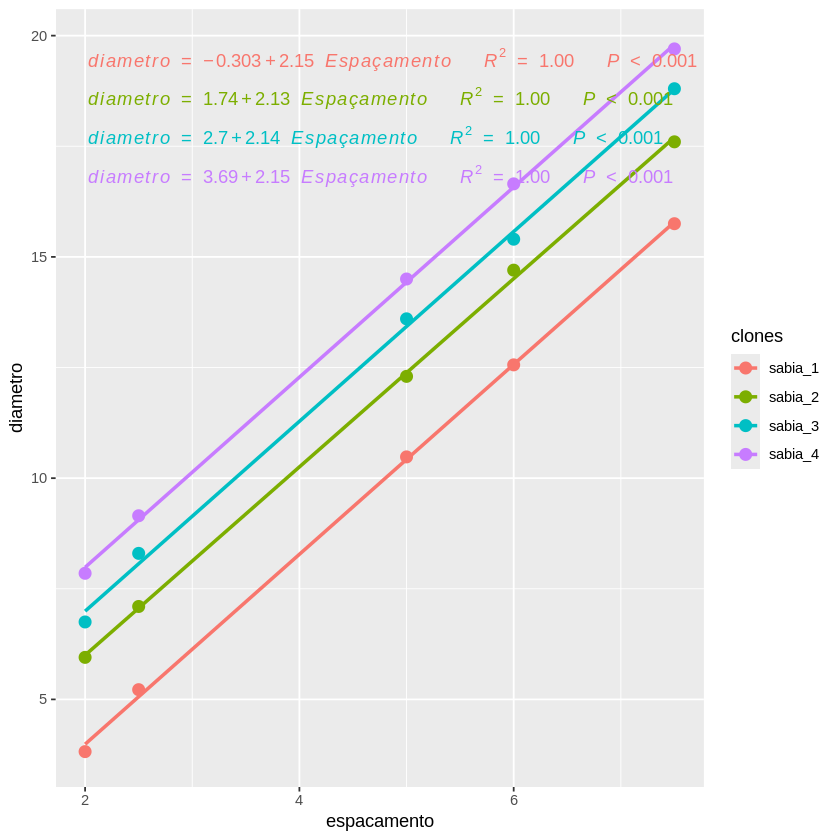

In [34]:
ggplot(dados, aes(x=espacamento, y=diametro, group=clones, color=clones)) +
      geom_point(size=3)+
      geom_smooth(method="lm", formula = y ~ poly(x, 1), se=FALSE)+

      stat_poly_eq(aes(label = paste(after_stat(eq.label),
      after_stat(rr.label),after_stat(p.value.label), sep = "~~~")),
             formula = y ~ poly(x, 1, raw=TRUE),
             parse = TRUE,
             label.x="left",
             label.y="top",
             eq.with.lhs = "italic(diametro)~'='~",
             eq.x.rhs="~italic(Espaçamento)")

**📌 stat_poly_eq() exibe a equação da regressão e o coeficiente de determinação (R²).**

**✔ eq.label → Mostra a equação da reta.**

**✔ rr.label → Mostra o valor de R².**

**✔  p.value.label → Mostra o valor de significancia (p)**

**✔ label.x="right" → Posiciona a equação à direita.**

**✔ label.y="bottom" → Posiciona a equação na parte inferior.**

➤ **Agora vamos começar a personalizar o nosso gráfico, vamos começar pelo tema**

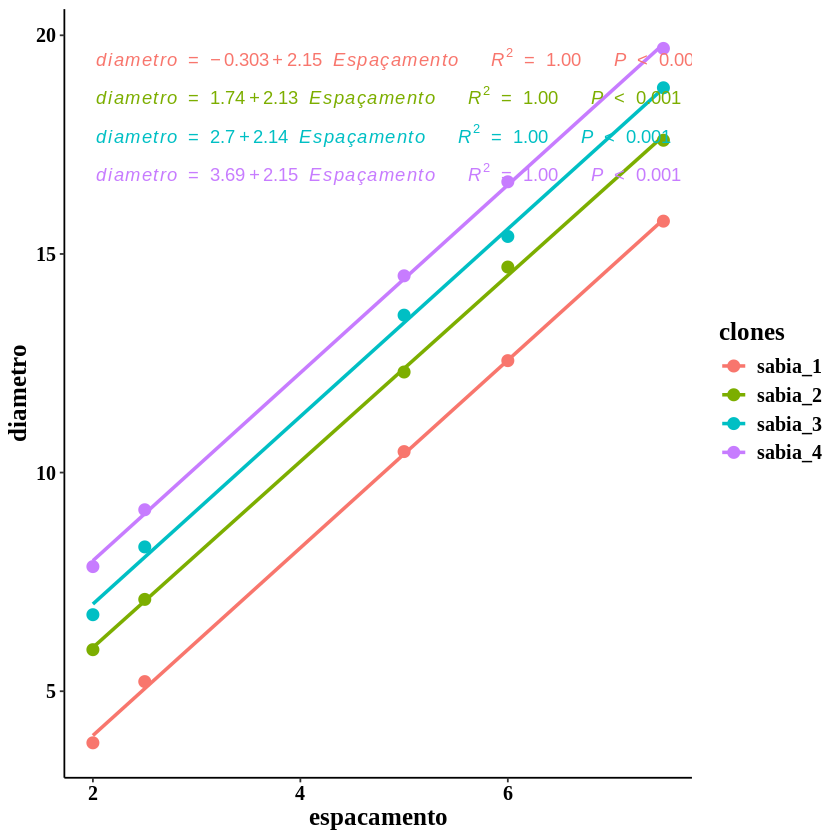

In [35]:
ggplot(dados, aes(x=espacamento, y=diametro,group=clones, color=clones)) +
      geom_point(size=3)+
      geom_smooth(method="lm", formula = y ~ poly(x, 1), se=FALSE)+
      stat_poly_eq(aes(label = paste(after_stat(eq.label), after_stat(rr.label), after_stat(p.value.label), sep = "~~~")),
             formula = y ~ poly(x, 1, raw=TRUE),
             parse = TRUE,
             label.x="left",
             label.y="top",
             eq.with.lhs = "italic(diametro)~'='~",
             eq.x.rhs="~italic(Espaçamento)") +

      theme_classic() +
      theme(text=element_text(family="Times", size=15, face="bold"),
      axis.text = element_text(color = "black", face="bold"))

**📌 theme_classic() aplica um tema mais limpo ao gráfico.**

**📌 element_text() ajusta o tamanho e estilo do texto.**

**✔ family="Times" → Usa a fonte Times New Roman.**

**✔ size=15 → Define o tamanho do texto.**

**✔ face="bold" → Deixa o texto em negrito.**

➤**Aqui vamos ajustar os rotulos dos eixos**

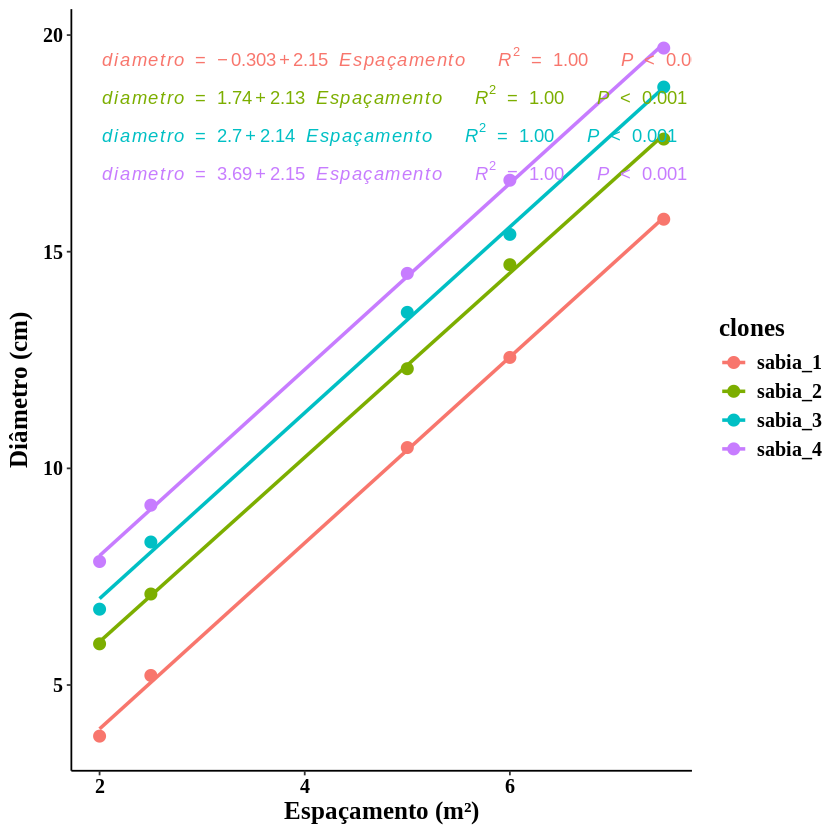

In [36]:
ggplot(dados, aes(x=espacamento, y=diametro, group=clones, color=clones)) +
      geom_point(size=3)+
      geom_smooth(method="lm", formula = y ~ poly(x, 1), se=FALSE)+
      stat_poly_eq(aes(label = paste(after_stat(eq.label), after_stat(rr.label), after_stat(p.value.label), sep = "~~~")),
             formula = y ~ poly(x, 1, raw=TRUE),
             parse = TRUE,
             label.x="left",
             label.y="top",
             eq.with.lhs = "italic(diametro)~'='~",
             eq.x.rhs="~italic(Espaçamento)") +
      theme_classic() +
      theme(text=element_text(family="Times", size=15, face="bold"),
      axis.text = element_text(color = "black", face="bold")) +

      ylab(expression(bold("Diâmetro (cm)"))) +
      xlab(expression(bold("Espaçamento (m²)")))

**📌 Define os nomes dos eixos em negrito usando expression(bold(...)).**

➤ **Dessa ver vamos ajustar as escalas dos eixos, para que se ajuste aos nossos dados**

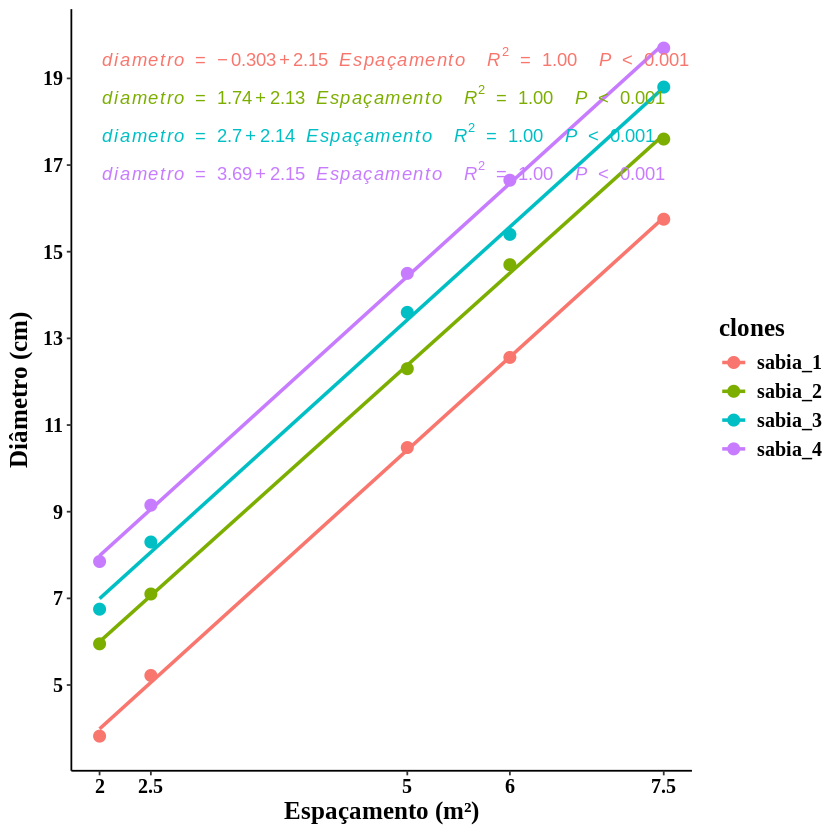

In [37]:
ggplot(dados, aes(x=espacamento, y=diametro, group=clones, color=clones )) +
      geom_point(size=3)+
      geom_smooth(method="lm", formula = y ~ poly(x, 1), se=FALSE)+
      stat_poly_eq(aes(label = paste(after_stat(eq.label), after_stat(rr.label), after_stat(p.value.label), sep = "~~")),
             formula = y ~ poly(x, 1, raw=TRUE),
             parse = TRUE,
             label.x="left",
             label.y="top",
             eq.with.lhs = "italic(diametro)~'='~",
             eq.x.rhs="~italic(Espaçamento)") +
      theme_classic() +
      theme(text=element_text(family="Times", size=15, face="bold"),
      axis.text = element_text(color = "black", face="bold")) +
      ylab(expression(bold("Diâmetro (cm)"))) +
      xlab(expression(bold("Espaçamento (m²)"))) +

      scale_y_continuous(breaks = seq(3,20,2)) +
      scale_x_continuous(breaks = c(2, 2.5, 5, 6, 7.5), labels = c('2', '2.5', '5', '6', '7.5'))

**📌 scale_y_continuous() ajusta os valores do eixo Y.**

**✔ O eixo Y terá intervalos de 2, de 3 até 18.**

**📌 scale_x_continuous() ajusta os valores do eixo X.**

**✔ O eixo X mostrará os rótulos personalizados para os valores 2, 2.5, 5, 6 e 7.5.**

➤ **Vamos adicionar uma anotação no nosso gráfico**

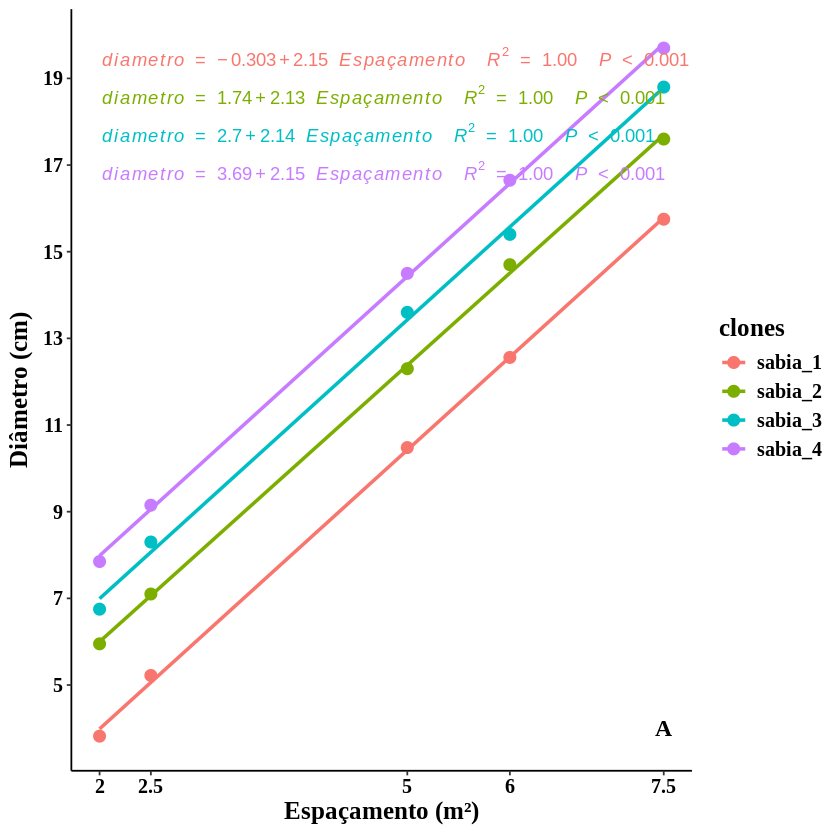

In [39]:
ggplot(dados, aes(x=espacamento, y=diametro, group=clones, color=clones)) +
      geom_point(size=3)+
      geom_smooth(method="lm", formula = y ~ poly(x, 1), se=FALSE)+
      stat_poly_eq(aes(label = paste(after_stat(eq.label), after_stat(rr.label), after_stat(p.value.label), sep = "~~")),
             formula = y ~ poly(x, 1, raw=TRUE),
             parse = TRUE,
             label.x="left",
             label.y="top",
             eq.with.lhs = "italic(diametro)~'='~",
             eq.x.rhs="~italic(Espaçamento)") +
      theme_classic() +
      theme(text=element_text(family="Times", size=15, face="bold"),
      axis.text = element_text(color = "black", face="bold")) +
      ylab(expression(bold("Diâmetro (cm)"))) +
      xlab(expression(bold("Espaçamento (m²)"))) +
      scale_y_continuous(breaks = seq(3,20,2)) +
      scale_x_continuous(breaks = c(2, 2.5, 5, 6, 7.5), labels = c('2', '2.5', '5', '6', '7.5'))+
      annotate("text", x = 7.5, y = 4 , label = "A",
      size = 5, color = "black", fontface="bold", family="Times")

**📌 annotate() adiciona texto no gráfico.**

**✔ x = 2, y = 17 → Define a posição do texto.**

**✔ label = "A" → Texto que será exibido.**

**✔ size = 5 → Define o tamanho da fonte.**

**✔ fontface="bold" → Texto em negrito.**

# **Passo 5: Salvar o Gráfico em um Arquivo**

**Após criar o gráfico, podemos salvá-lo como uma imagem**

**Primeiro, salvamos o gráfico em uma variável, que aqui chamo de grafico**

In [40]:
grafico <- ggplot(dados, aes(x=espacamento, y=diametro, group=clones, color=clones)) +
      geom_point(size=3)+
      geom_smooth(method="lm", formula = y ~ poly(x, 1), se=FALSE)+
      stat_poly_eq(aes(label = paste(after_stat(eq.label), after_stat(rr.label), after_stat(p.value.label), sep = "~~")),
             formula = y ~ poly(x, 1, raw=TRUE),
             parse = TRUE,
             label.x="left",
             label.y="top",
             eq.with.lhs = "italic(diametro)~'='~",
             eq.x.rhs="~italic(Espaçamento)") +
      theme_classic() +
      theme(text=element_text(family="Times", size=15, face="bold"),
      axis.text = element_text(color = "black", face="bold")) +
      ylab(expression(bold("Diâmetro (cm)"))) +
      xlab(expression(bold("Espaçamento (m²)"))) +
      scale_y_continuous(breaks = seq(3,20,2)) +
      scale_x_continuous(breaks = c(2, 2.5, 5, 6, 7.5), labels = c('2', '2.5', '5', '6', '7.5')) +
      annotate("text", x = 7.5, y = 4 , label = "A", size = 5, color = "black", fontface="bold", family="Times")

**Após salvar, usamos o ggsave() para salvar o arquivo como png e definimos a altura, largura e o dpi(resolução)**

In [41]:
ggsave("figura1.png", grafico, width=10, height=10, dpi=300)

**📌 ggsave() salva o gráfico no formato PNG.**

**✔ width=10, height=10 → Define o tamanho da imagem.**

**✔ dpi=300 → Garante uma alta resolução.**